# Lab 6: Hough Circle Detection

เทคนิค Hough Transform ใช้ข้อมูลขอบ (Edge) ของวัตถุในรูปภาพ ในการรู้จำรูปร่างของวัตถุ (Shape Recognition) เช่น เส้นตรง วงกลม หรือรูปร่างที่กำหนดได้ ***โดยในแล็บนี้ เราจะศึกษาวิธีการใช้ Hough Transform ในการหาตำแหน่งวัตถุรูปวงกลมในภาพ อย่างเหรียญ และหาเส้นรอบวงด้วย*** 

สำหรับรูปวงกลม เทคนิคนี้จะแปลงภาพขอบ ให้อยู่ใน Parameter Space ซึ่งค่าตำแหน่งต่าง ๆ ที่เป็นไปได้ใน Space นี้ จะเป็นพารามิเตอร์ของวงกลมทั้งหมดที่เป็นไปได้ในภาพนี้ สำหรับรูปวงกลมก็จะมีพารามิเตอร์เป็นตำแหน่ง X และ Y ของจุดศูนย์กลางของวงกลมและรัศมีของวงกลม ดังนั้น Parameter Space นี้ก็จะมี 3 มิติ ในขณะที่ค่าของแต่ละตำแหน่งแทนคะแนนความน่าจะเป็นที่รูปวงกลมนี้จะเป็นวัตถุ

**References**
1. https://scikit-image.org/docs/stable/auto_examples/edges/plot_circular_elliptical_hough_transform.html#sphx-glr-auto-examples-edges-plot-circular-elliptical-hough-transform-py

In [ ]:
import cv2
import numpy as np
from skimage import data, color
from skimage.draw import circle_perimeter
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
import matplotlib.pyplot as plt
%matplotlib inline

โหลดภาพตัวอย่าง

In [ ]:
gray = data.coins()

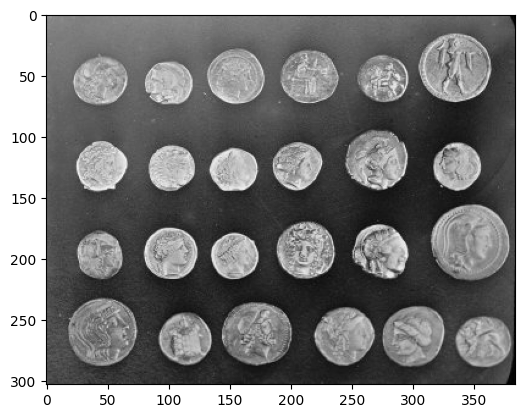

In [ ]:
plt.imshow(gray, cmap='gray')

ใช้วิธี Edge Canny Algorithm ในการหาขอบ (Edge) ของของวัตถุในรูปภาพ

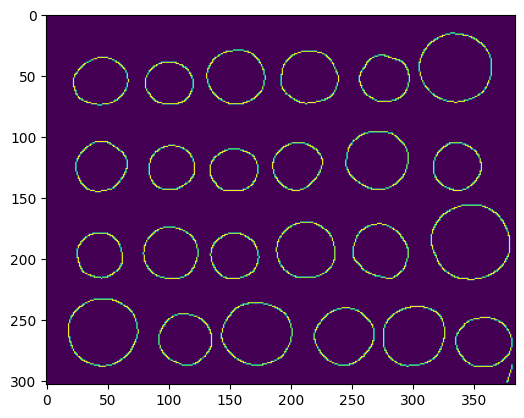

In [ ]:
edges = canny(gray, sigma=3, low_threshold=10, high_threshold=70)
plt.imshow(edges)

ใช้เทคนิค Hough Transform ในการหาวัตถุรูปวงกลมในภาพ เริ่มต้นด้วยการหาคะแนนความน่าจะเป็นวัตถุด้วยฟังก์ชัน [`hough_circle`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.hough_circle) ซึ่งเราจะต้องป้อนช่วงของค่ารัศมีของวัตถุที่จะทำการตรวจหาด้วย แล้วเลือกเฉพาะจุดสูงสุดมาเป็นคำตอบพีค ด้วยฟังก์ชัน [`hough_circle_peaks`](https://scikit-image.org/docs/stable/api/skimage.transform.html#skimage.transform.hough_circle_peaks) ซึ่งจะทำ Non-maximum Suppression เพื่อเลือกวัตถุเพียงวงกลมเดียวในบริเวณนั้นให้ แล้วแสดงผลลัพธ์ด้วยฟังก์ชัน [`circle_perimeter`](https://scikit-image.org/docs/stable/api/skimage.draw.html#skimage.draw.circle_perimeter)

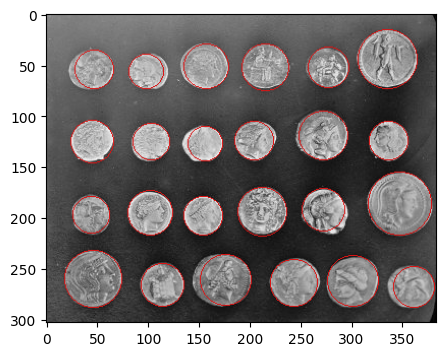

In [ ]:
# Detect two radii
hough_radii = np.arange(15, 35, 1)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=30,
                                           min_xdistance=40,
                                           min_ydistance=40)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(gray)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

ตัวอย่างคะแนนที่ได้จากการคำนวณ Hough Transform

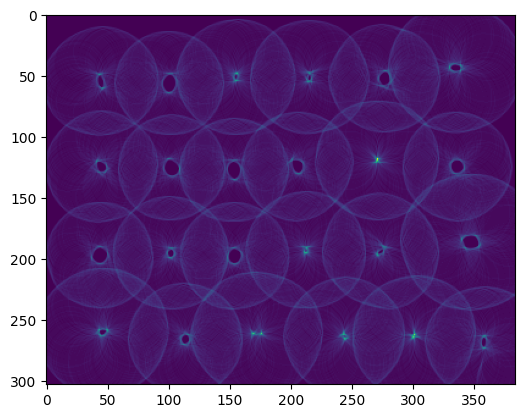

In [ ]:
plt.imshow(hough_res[10])

----